In [ ]:
!pip install chardet

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import chardet
from geopy.geocoders import Nominatim
import folium
import spacy
import re

In [ ]:
with open('IPC_crime_data1.csv','rb') as df:
  encoding=chardet.detect(df.read())['encoding']
data_frame=pd.read_csv('IPC_crime_data1.csv',encoding=encoding)

In [ ]:
data_frame.assign(latitude=None,longitude=None)

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,latitude,longitude
0,ASSAM,BARPETA,2008,54,20,0,97,0,97,128,...,14,34,0,240,0,215,806,2539,None,None
1,ASSAM,BASKA,2008,67,19,0,23,0,23,35,...,4,16,0,13,0,12,126,465,None,None
2,ASSAM,BONGAIGAON,2008,15,10,0,51,0,51,60,...,5,13,0,106,0,81,388,1219,None,None
3,ASSAM,C.I.D.,2008,0,0,0,0,0,0,0,...,0,0,0,0,0,0,13,24,None,None
4,ASSAM,CACHAR,2008,56,6,0,72,0,72,128,...,13,19,0,216,0,61,2843,4869,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2819,DELHI UT,STF,2012,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,6,None,None
2820,DELHI UT,WEST,2012,52,37,10,79,0,79,454,...,18,53,6,327,0,292,1144,5558,None,None
2821,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,0,2,0,1,0,44,392,787,None,None
2822,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,...,0,7,2,5,0,219,1668,3494,None,None


In [ ]:
data_frame.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

In [ ]:
data_frame.drop(['ATTEMPT TO MURDER','CULPABLE HOMICIDE NOT AMOUNTING TO MURDER','KIDNAPPING & ABDUCTION','KIDNAPPING AND ABDUCTION OF OTHERS',
                 'PREPARATION AND ASSEMBLY FOR DACOITY','CRIMINAL BREACH OF TRUST','HURT/GREVIOUS HURT','ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
                 'CRUELTY BY HUSBAND OR HIS RELATIVES','INSULT TO MODESTY OF WOMEN','CRUELTY BY HUSBAND OR HIS RELATIVES','OTHER IPC CRIMES'
                 ],axis=1,inplace=True)

In [ ]:
data_frame.shape

(2824, 22)

In [ ]:
# Instead of using map, use the rename method for renaming columns:
data_frame = data_frame.rename(columns={'STATE/UT': 'states'})

In [ ]:
dis=data_frame['DISTRICT'].unique()

In [ ]:
for j,i in data_frame.iterrows():
    if i['DISTRICT']=='None' or i['DISTRICT']=='TOTAL' or i['DISTRICT']=='WEST' or i['DISTRICT']=='OUTER' or i['DISTRICT']=='EAST' or i['DISTRICT']=='TOTAL':
        data_frame.drop(j,inplace=True)

In [ ]:
def remove(name):

  for i in names:
    if i in name:
      name=name.replace(i,'')
  return name

In [ ]:
data_frame.head()

,states,DISTRICT,YEAR,MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,DACOITY,ROBBERY,...,AUTO THEFT,OTHER THEFT,RIOTS,CHEATING,COUNTERFIETING,ARSON,DOWRY DEATHS,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,TOTAL IPC CRIMES
0,ASSAM,BARPETA,2008,54,97,0,97,117,14,16,...,25,184,277,11,1,3,14,0,215,2539
1,ASSAM,BASKA,2008,67,23,0,23,30,3,7,...,1,34,3,4,1,3,4,0,12,465
2,ASSAM,BONGAIGAON,2008,15,51,0,51,35,7,7,...,27,111,83,36,3,4,5,0,81,1219
3,ASSAM,C.I.D.,2008,0,0,0,0,0,0,0,...,0,1,0,10,0,0,0,0,0,24
4,ASSAM,CACHAR,2008,56,72,0,72,106,43,23,...,183,457,245,64,3,49,13,0,61,4869


In [ ]:
data_frame['DISTRICT']=data_frame['DISTRICT'].str.capitalize()
data_frame['states']=data_frame['states'].str.capitalize()

In [ ]:
data_frame=data_frame.assign(address=None)

In [ ]:
data_frame['address']=data_frame['DISTRICT']+','+data_frame['states']+','+'India'

In [ ]:
import time
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderUnavailable

In [ ]:
data_frame=data_frame.assign(location=None)

In [ ]:
names=['G.R.P.','CITY','RLY.','RLY .','COMMR .','COMMR.']

In [ ]:
patterns = [' RLY\.$', ' G.R.P$', ' CITY$', ' RLY.$']

In [ ]:
data_frame['location']=data_frame['DISTRICT'].str.replace(patterns, '', regex=True)

TypeError: unhashable type: 'list'

In [ ]:
import re

names=['G.R.P.','CITY','RLY.','RLY .','COMMR .','COMMR.']
patterns = [' RLY\.', ' G.R.P', ' CITY', ' RLY \.', ' COMMR \.', ' COMMR\.'] # List of patterns
pattern = '|'.join(patterns) # Joining patterns with '|' to create a single regex pattern

data_frame['location'] = data_frame['DISTRICT'].str.replace(pattern, '', regex=True)

In [ ]:
data_frame.head()

,states,DISTRICT,YEAR,MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,DACOITY,ROBBERY,...,RIOTS,CHEATING,COUNTERFIETING,ARSON,DOWRY DEATHS,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,TOTAL IPC CRIMES,address,location
0,Assam,Barpeta,2008,54,97,0,97,117,14,16,...,277,11,1,3,14,0,215,2539,"Barpeta,Assam,India",Barpeta
1,Assam,Baska,2008,67,23,0,23,30,3,7,...,3,4,1,3,4,0,12,465,"Baska,Assam,India",Baska
2,Assam,Bongaigaon,2008,15,51,0,51,35,7,7,...,83,36,3,4,5,0,81,1219,"Bongaigaon,Assam,India",Bongaigaon
3,Assam,C.i.d.,2008,0,0,0,0,0,0,0,...,0,10,0,0,0,0,0,24,"C.i.d.,Assam,India",C.i.d.
4,Assam,Cachar,2008,56,72,0,72,106,43,23,...,245,64,3,49,13,0,61,4869,"Cachar,Assam,India",Cachar


<Axes: xlabel='YEAR'>

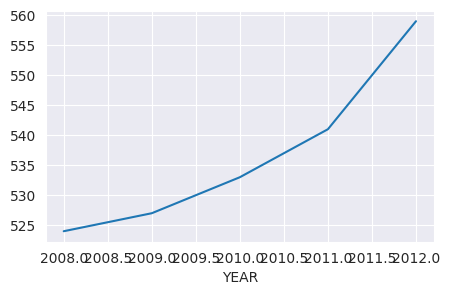

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(5,3))
data_frame['YEAR'].value_counts().plot(kind='line')

In [ ]:
data_frame=data_frame.assign(latitude=None,longitude=None)

In [ ]:
def get_lat_long(place):
    geolocator_agent = Nominatim(user_agent="geoloc")
    loc=geolocator_agent.geocode(place,timeout=6)
    try:
      return loc.latitude,loc.longitude
    except:
        return None,None

In [ ]:
#data_frame['latitude'],data_frame['longitude']=get_lat_long(data_frame['location'])

In [ ]:
#data_frame['latitude'].value_counts()

,count
latitude,


In [ ]:
cluster_cols=data_frame[['YEAR','MURDER','RAPE','RIOTS','THEFT','RIOTS','DOWRY DEATHS','TOTAL IPC CRIMES']]

In [ ]:
sns.pairplot(data_frame,vars=cluster_cols)

In [ ]:
cluster_cols

,YEAR,MURDER,RAPE,RIOTS,THEFT,RIOTS,DOWRY DEATHS,TOTAL IPC CRIMES
0,2008,54,97,277,209,277,14,2539
1,2008,67,23,3,35,3,4,465
2,2008,15,51,83,138,83,5,1219
3,2008,0,0,0,1,0,0,24
4,2008,56,72,245,640,245,13,4869
...,...,...,...,...,...,...,...,...
2817,2012,46,116,12,2892,12,11,7040
2818,2012,47,87,6,1171,6,18,4085
2819,2012,0,0,0,0,0,0,6
2821,2012,5,6,17,81,17,0,787


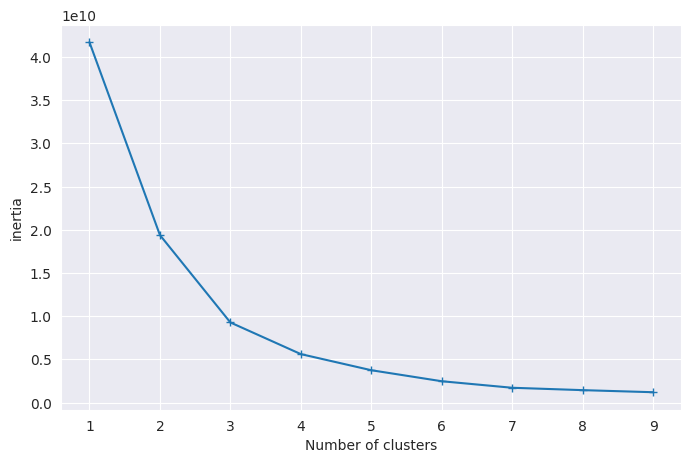

In [ ]:
cls=[]
for i in range(1,10):
  knn=KMeans(n_clusters=i,random_state=42,init="k-means++").fit(cluster_cols)
  cls.append(knn.inertia_)
plt.figure(figsize=(8,5))
plt.plot(range(1,10),cls,marker='+',markerfacecolor='b')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=3,random_state=42,init="k-means++").fit(cluster_cols)

In [ ]:
cluster_cols['cluster']=kmeans.labels_

<ipython-input-118-645cbc46f3d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_cols['cluster']=kmeans.labels_


<Axes: xlabel='cluster'>

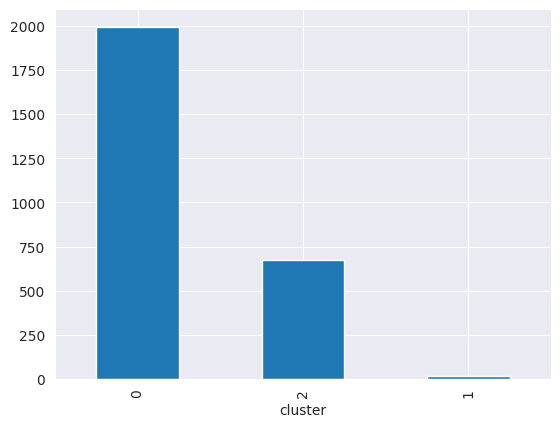

In [ ]:
cluster_cols['cluster'].value_counts().plot(kind='bar')

In [ ]:
cluster_cols.head()

,YEAR,MURDER,RAPE,RIOTS,THEFT,RIOTS,DOWRY DEATHS,TOTAL IPC CRIMES,cluster
0,2008,54,97,277,209,277,14,2539,0
1,2008,67,23,3,35,3,4,465,0
2,2008,15,51,83,138,83,5,1219,0
3,2008,0,0,0,1,0,0,24,0
4,2008,56,72,245,640,245,13,4869,2


In [ ]:
cluster_cols['cluster'].value_counts()

,count
cluster,
0,1995
2,673
1,16


**0 -> Low**

**2 -> Medium**

**1 -> High**

In [ ]:
cluster_2=cluster_cols[cluster_cols['cluster']==2]['TOTAL IPC CRIMES']
cluster_1=cluster_cols[cluster_cols['cluster']==1]['TOTAL IPC CRIMES']
cluster_0=cluster_cols[cluster_cols['cluster']==0]['TOTAL IPC CRIMES']

In [ ]:
c2_max,c2_min=cluster_2.max(),cluster_2.min()
c1_max,c1_min=cluster_1.max(),cluster_1.min()
c0_max,c0_min=cluster_0.max(),cluster_0.min()
print(c1_max,c1_min)
print(c2_max,c2_min)
print(c0_max,c0_min)

54287 25370
21346 3555
3763 2


In [ ]:
cluster_cols['level']=cluster_cols['cluster'].map({0:'medium',1:'high',2:'low'})
#cluster_cols['intensity_level']=cluster_cols['cluster'].map({0:4.11,1:56.03,2:30.07})

<ipython-input-124-e9d0fc50ed98>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_cols['level']=cluster_cols['cluster'].map({0:'medium',1:'high',2:'low'})


In [ ]:
cluster_cols.head()

,YEAR,MURDER,RAPE,RIOTS,THEFT,RIOTS,DOWRY DEATHS,TOTAL IPC CRIMES,cluster,level
0,2008,54,97,277,209,277,14,2539,0,medium
1,2008,67,23,3,35,3,4,465,0,medium
2,2008,15,51,83,138,83,5,1219,0,medium
3,2008,0,0,0,1,0,0,24,0,medium
4,2008,56,72,245,640,245,13,4869,2,low


In [ ]:
cluster_cols.shape,data_frame.shape

((2684, 10), (2684, 26))

In [ ]:
with open('clean (1).csv','rb') as df:
  encoding=chardet.detect(df.read())['encoding']
df=pd.read_csv('IPC_crime_data.csv',encoding=encoding)

In [ ]:
df.shape

(6125, 33)

In [ ]:
data_frame.shape

(5807, 36)

In [ ]:
cluster_cols=cluster_cols.assign(place=None)
cluster_cols=cluster_cols.assign(states=None)
cluster_cols=cluster_cols.assign(latitude=None)
cluster_cols=cluster_cols.assign(longitude=None)
cluster_cols=cluster_cols.assign(states=None)

In [ ]:
data_frame.head()

,states,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,address,latitude,longitude
0,Andhra pradesh,Adilabad,2005,108,48,13,53,0,53,65,...,144,77,280,0,276,1838,5033,"Adilabad,Andhra pradesh,India",None,None
1,Andhra pradesh,Anantapur,2005,172,125,3,16,0,16,60,...,173,57,137,0,349,1500,4545,"Anantapur,Andhra pradesh,India",None,None
2,Andhra pradesh,Chittoor,2005,105,40,0,35,0,35,72,...,91,223,202,0,541,2573,6746,"Chittoor,Andhra pradesh,India",None,None
3,Andhra pradesh,Cuddapah,2005,96,0,0,21,0,21,36,...,116,18,95,0,343,1846,4072,"Cuddapah,Andhra pradesh,India",None,None
4,Andhra pradesh,Cyberabad,2005,150,88,10,44,0,44,151,...,119,96,701,3,898,2086,12079,"Cyberabad,Andhra pradesh,India",None,None


In [ ]:
cluster_cols.head()

,YEAR,MURDER,RAPE,RIOTS,THEFT,RIOTS,DOWRY DEATHS,TOTAL IPC CRIMES,cluster,level,place,intensity_level,states,latitude,longitude
0,2005,108,53,68,329,68,21,5033,0,medium,None,None,Andhra pradesh,None,None
1,2005,172,16,102,439,102,12,4545,0,medium,None,None,Andhra pradesh,None,None
2,2005,105,35,87,1269,87,9,6746,0,medium,None,None,Andhra pradesh,None,None
3,2005,96,21,66,297,66,7,4072,2,low,None,None,Andhra pradesh,None,None
4,2005,150,44,44,2287,44,34,12079,0,medium,None,None,Andhra pradesh,None,None


In [ ]:
cluster_cols=cluster_cols.assign(intensity=0)

In [ ]:
cluster_cols['intensity']=cluster_cols['TOTAL IPC CRIMES']

In [ ]:
def get_intensity(intensity):
  if intensity<=c0_max and intensity>=c0_min:
    inten0=(intensity-c0_min)/(c0_max-c0_min)
    return inten0
  elif intensity<=c1_max and intensity>=c1_min:
    inten1=(intensity-c1_min)/(c1_max-c1_min)
    return inten1
  else:
    inten2=(intensity-c2_min)/(c2_max-c2_min)
    return inten2

In [ ]:
cluster_cols['intensity']=cluster_cols['intensity'].apply(lambda x: get_intensity(x))

In [ ]:
cluster_cols['intensity'],cluster_cols['cluster']

(0       0.674555
 1       0.123106
 2       0.323584
 3       0.005850
 4       0.073858
           ...   
 2817    0.195886
 2818    0.029790
 2819    0.001064
 2821    0.208721
 2822    0.928476
 Name: intensity, Length: 2684, dtype: float64,
 0       0
 1       0
 2       0
 3       0
 4       2
        ..
 2817    2
 2818    2
 2819    0
 2821    0
 2822    0
 Name: cluster, Length: 2684, dtype: int32)

In [ ]:
cluster_cols['intensity']=cluster_cols['intensity'].apply(lambda x: round(x,2))

,YEAR,MURDER,RAPE,RIOTS,THEFT,RIOTS,DOWRY DEATHS,TOTAL IPC CRIMES,cluster,level,intensity
0,2008,54,97,277,209,277,14,2539,0,medium,0.67
1,2008,67,23,3,35,3,4,465,0,medium,0.12
2,2008,15,51,83,138,83,5,1219,0,medium,0.32
3,2008,0,0,0,1,0,0,24,0,medium,0.01
4,2008,56,72,245,640,245,13,4869,2,low,0.07


In [ ]:
for index in data_frame.index: # Iterate using the index of data_frame
  if data_frame.loc[index, 'TOTAL IPC CRIMES'] == cluster_cols.loc[index, 'TOTAL IPC CRIMES']:  # Use .loc for index-based access
    cluster_cols.loc[index, 'place'] = data_frame.loc[index, 'DISTRICT']
    cluster_cols.loc[index, 'states'] = data_frame.loc[index, 'states']
    cluster_cols.loc[index, 'latitude'] = data_frame.loc[index, 'latitude']
    cluster_cols.loc[index, 'longitude'] = data_frame.loc[index, 'longitude']

In [ ]:
cluster_cols.head()

,YEAR,MURDER,RAPE,RIOTS,THEFT,RIOTS,DOWRY DEATHS,TOTAL IPC CRIMES,cluster,level,intensity,place,states,latitude,longitude
0,2008,54,97,277,209,277,14,2539,0,medium,0.67,Barpeta,Assam,None,None
1,2008,67,23,3,35,3,4,465,0,medium,0.12,Baska,Assam,None,None
2,2008,15,51,83,138,83,5,1219,0,medium,0.32,Bongaigaon,Assam,None,None
3,2008,0,0,0,1,0,0,24,0,medium,0.01,C.i.d.,Assam,None,None
4,2008,56,72,245,640,245,13,4869,2,low,0.07,Cachar,Assam,None,None


In [ ]:
cluster_cols=cluster_cols.assign(new_place=None)

In [ ]:
nlp=spacy.load("en_core_web_sm")
def get_place(place):
  doc=nlp(place)
  for ent in doc.ents:
      if ent.label_=="GPE":
        return ent.text
      else:
        return place

In [ ]:
cluster_cols['new_place']=cluster_cols['place'].apply(get_place)

In [ ]:
cluster_cols.head()

,YEAR,MURDER,RAPE,RIOTS,THEFT,RIOTS,DOWRY DEATHS,TOTAL IPC CRIMES,cluster,level,intensity,place,states,latitude,longitude,new_place
0,2008,54,97,277,209,277,14,2539,0,medium,0.67,Barpeta,Assam,None,None,Barpeta
1,2008,67,23,3,35,3,4,465,0,medium,0.12,Baska,Assam,None,None,Baska
2,2008,15,51,83,138,83,5,1219,0,medium,0.32,Bongaigaon,Assam,None,None,Bongaigaon
3,2008,0,0,0,1,0,0,24,0,medium,0.01,C.i.d.,Assam,None,None,None
4,2008,56,72,245,640,245,13,4869,2,low,0.07,Cachar,Assam,None,None,None


In [ ]:
cluster_cols.to_csv('c_data.csv')

In [ ]:
def get_lat_long(place):
    geolocator_agent = Nominatim(user_agent="geoloc")
    try:
        location = geolocator_agent.geocode(place, timeout=6)  # Increased timeout to 10 seconds
        if location is None:
            return None, None
        else:
            return location.latitude, location.longitude
    except (GeocoderTimedOut, GeocoderUnavailable) as e:
        print(f"Error geocoding {place}: {e}")
        return None, None

In [ ]:
for index, row in cluster_cols.iterrows():
    lat, longg = get_lat_long(row['new_place'])
    cluster_cols.loc[index, 'latitude'] = lat
    cluster_cols.loc[index, 'longitude'] = longg

In [ ]:
data_frame.to_csv('added_lat_long.csv')
cluster_cols.to_csv('clustered_data.csv')
#info.to_csv('centroids.csv')